In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder 
from sklearn.metrics import silhouette_score
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.shape

(200, 5)

In [6]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(200, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


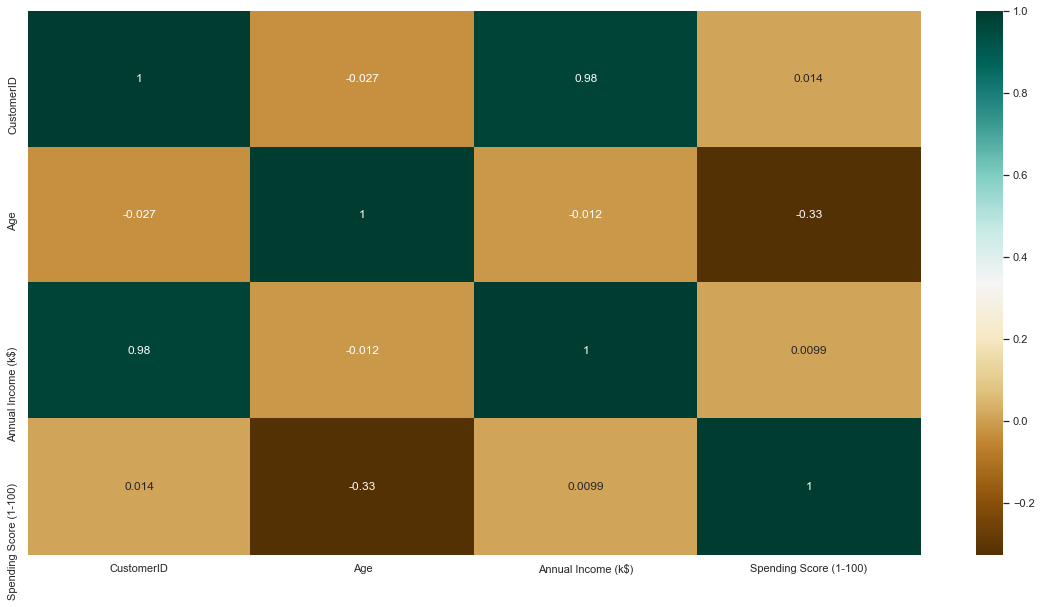

In [10]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True);

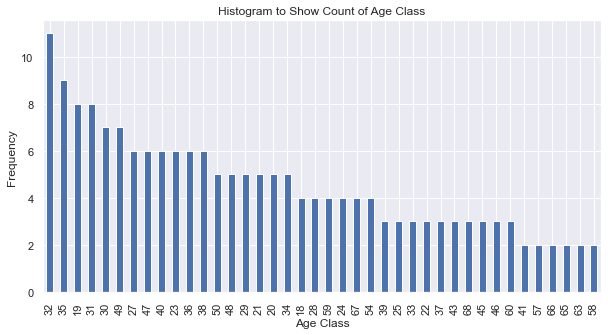

In [11]:
df.Age.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Histogram to Show Count of Age Class")
plt.ylabel("Frequency")
plt.xlabel("Age Class");

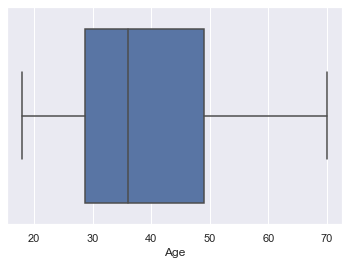

In [12]:
sns.boxplot(x=df["Age"]);

In [13]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [14]:
Clus_dataSet = StandardScaler().fit_transform(df)

In [15]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Clus_dataSet)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Text(0, 0.5, 'Inertia')

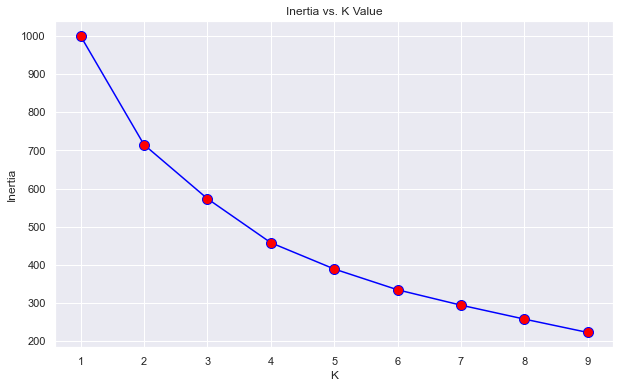

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),inertias,color='blue', marker='o',
         markerfacecolor='red', markersize=10)
#plt.axis([1, 8.5, 0, 1300])
plt.title('Inertia vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia')

In [17]:
silhouette_scores = [silhouette_score(Clus_dataSet, model.labels_)
                     for model in kmeans_per_k[1:]]

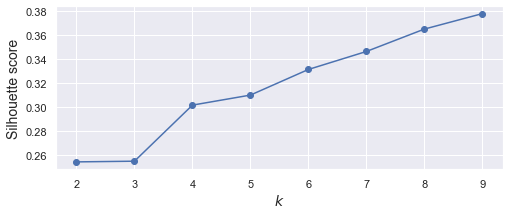

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [32]:
kmeans = KMeans(
                n_clusters=5, 
                init='k-means++', 
                n_init=10,
                max_iter=300, 
                tol=0.0001, 
                precompute_distances='auto', 
                verbose=0, 
                random_state=101, 
                copy_x=True, 
                n_jobs=-1, 
                algorithm='auto'
                )

In [33]:
kmeans.fit(Clus_dataSet)

KMeans(n_clusters=5, n_jobs=-1, precompute_distances='auto', random_state=101)

In [34]:
k_means_labels = kmeans.labels_
print(k_means_labels)

[1 1 1 1 1 1 2 1 4 1 4 1 2 1 4 1 1 1 4 1 1 1 2 1 2 1 2 1 2 1 4 1 4 1 2 1 2
 1 2 1 2 1 4 1 2 1 2 1 1 1 2 1 1 4 2 4 2 4 1 4 4 1 2 2 4 1 2 2 1 1 4 2 2 2
 4 1 2 4 1 2 4 4 4 2 1 4 2 1 2 2 2 1 4 2 2 1 2 1 4 1 1 2 4 1 4 1 2 4 4 4 4
 1 2 1 1 1 2 2 2 2 3 2 2 3 0 3 0 3 4 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [35]:
k_means_cluster_centers = kmeans.cluster_centers_
k_means_cluster_centers

array([[ 1.08067278,  0.14809719,  0.07477313,  1.02570541, -1.21752808],
       [-0.87175534, -0.0881844 , -1.00209318, -0.84165752,  0.41268052],
       [-0.4999775 , -0.88640526,  0.76168963, -0.44961726, -0.33159294],
       [ 1.04747082,  0.07050951, -0.45213014,  0.97293875,  1.21414431],
       [-0.52350397,  1.12815215,  1.28276771, -0.47677566, -0.40668932]])

In [36]:
df["Clus_km"] = kmeans.labels_

In [37]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [38]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,162.891892,0.513514,39.891892,87.432432,18.837838
1,50.169811,0.396226,24.886792,38.509434,60.830189
2,71.634146,0.000000,49.463415,48.780488,41.658537
3,160.975000,0.475000,32.550000,86.050000,81.475000
4,70.275862,1.000000,56.724138,48.068966,39.724138


In [39]:
df["Clus_km"].value_counts()

1    53
2    41
3    40
0    37
4    29
Name: Clus_km, dtype: int64

In [40]:
df[df["Clus_km"] == 4]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
8,9,1,64,19,3,4
10,11,1,67,19,14,4
14,15,1,37,20,13,4
18,19,1,52,23,29,4
30,31,1,60,30,4,4
32,33,1,53,33,4,4
42,43,1,48,39,36,4
53,54,1,59,43,60,4
55,56,1,47,43,41,4
57,58,1,69,44,46,4


[]

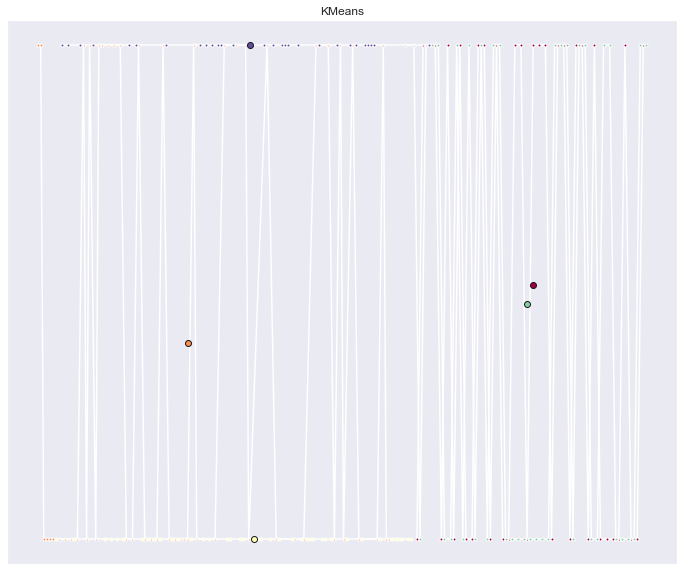

In [41]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 10))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(5), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(Clus_dataSet[my_members, 0], Clus_dataSet[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
#plt.show()

In [67]:
len([[4,4], [-2, -1], [2, -3], [1, 1]])

4

In [69]:
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    print (k)
    print(col)

0
[0.61960784 0.00392157 0.25882353 1.        ]
1
[0.95686275 0.42745098 0.2627451  1.        ]
2
[0.99607843 0.87843137 0.54509804 1.        ]
3
[0.90196078 0.96078431 0.59607843 1.        ]


In [72]:
for k, col in zip(range(6), colors):
    print (k)
    print(col)

0
[0.61960784 0.00392157 0.25882353 1.        ]
1
[0.95686275 0.42745098 0.2627451  1.        ]
2
[0.99607843 0.87843137 0.54509804 1.        ]
3
[0.90196078 0.96078431 0.59607843 1.        ]
4
[0.4        0.76078431 0.64705882 1.        ]
5
[0.36862745 0.30980392 0.63529412 1.        ]


In [74]:
set(k_means_labels)

{0, 1, 2, 3, 4, 5}

In [75]:
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.95686275, 0.42745098, 0.2627451 , 1.        ],
       [0.99607843, 0.87843137, 0.54509804, 1.        ],
       [0.90196078, 0.96078431, 0.59607843, 1.        ],
       [0.4       , 0.76078431, 0.64705882, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])